## Imports

In [100]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torch.utils.data as data
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt
from torchsummary import summary
import torch.optim as optim
from torchvision import models

## Constants

In [2]:
EPOCHS = 2
BATCH_SIZE = 10
LEARNING_RATE = 0.003
TRAIN_DATA_PATH = "./data/train/"
TEST_DATA_PATH = "./data/test/"

## Loading data, creating datasets

### Transforming images (resize, normalization)

In [11]:
TRANSFORM_IMG = transforms.Compose(
    [
        transforms.Resize(256),
        transforms.CenterCrop(256),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]
)

### Loading data

In [28]:
train_data = torchvision.datasets.ImageFolder(root=TRAIN_DATA_PATH, transform=TRANSFORM_IMG)
train_data_loader = data.DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True,  num_workers=4)
test_data = torchvision.datasets.ImageFolder(root=TEST_DATA_PATH, transform=TRANSFORM_IMG)
test_data_loader  = data.DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=True, num_workers=4)
print(f"train data classes: {train_data.classes}, train data size: {len(train_data.imgs)}")
print(f"test data classes:  {train_data.classes}, test data size:  {len(test_data.imgs)}")

train data classes: ['chihuahua', 'muffin'], train data size: 4733
test data classes:  ['chihuahua', 'muffin'], test data size:  1184


### Visualize data

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


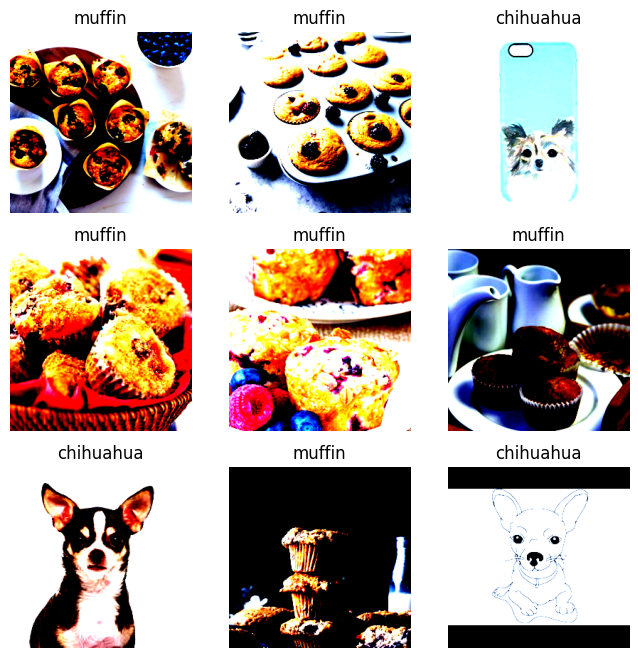

In [39]:
idx_to_class_names = {val: key for key, val in train_data.class_to_idx.items()}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    aux_img = img.permute((1, 2, 0)).contiguous()
    figure.add_subplot(rows, cols, i)
    plt.title(idx_to_class_names[label])
    plt.axis("off")
    plt.imshow(aux_img, cmap="gray")
plt.show()

## Defining NN

### Define elements, data flow

In [103]:
resnet18 = models.resnet18(pretrained=True,)
resnet18

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

input image: 256x256x3
conv 1     : 256,256,

### Test if net works w random image

In [98]:
for images, labels in train_data_loader:
    # print(images,labels)
    break
channels, height, width = (images[0,:,:,:].shape)
# Equates to one random 28x28 image
# random_data = torch.rand((1, 1, 28, 28))

# my_nn = net().to(device)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # PyTorch v0.4.0
model = Net().to(device)
summary(model, input_size=(channels, height, width))

result = model(images[0])
print (result)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (2x246016 and 64x120)

### Define loss fn, optimizer

In [8]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE, momentum=0.9)

## Training

In [75]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_data_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

RuntimeError: Given groups=1, weight of size [32, 1, 3, 3], expected input[10, 3, 256, 256] to have 1 channels, but got 3 channels instead